In [10]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
np.random.seed(23)
pd.set_option('display.max_columns', None)

# 1. Splitting the Dataset

- Division into sets:
    - For modelers (70%) - X_modelling
    - For validators (30%) - X_validating

In [18]:
df = pd.read_csv('../Data/character-predictions.csv')
X = df
X_modeling, X_validating = train_test_split(
    X, test_size=0.3, random_state=42
)

print(X_modeling.shape)
print(X_validating.shape)

(1362, 33)
(584, 33)


## About dataset:
This dataset consists of 1362 records and 32 columns describing .

**Columns descriptions:**
- **S.No** - id (unique for every character)
- **actual** - is the character alive
- **pred** - predictions whether the character will survive or not
- **alive** - probability that the character will survive
- **plod** - probability that the character will die
- **name** - character name
- **title** - character title
- **male** - is the character male
- **culture** - character culture
- **dateOfBirth** - date of birth
- **dateOfDeath** - date of death
- **mother** - character's mother's name
- **father** - character's father's name
- **heir** - name of character heir
- **spouse** - name of character spouse
- **bookX** - does the character appears in book X
- **isAliveX** - is the relative X alive 
- **isNoble** - is the character noble
- **age** - age of the character
- **numDeadRelations** - ???
- **boolDeadRelations** - ???
- **isPopular** - is the character popular with readers
- **popularity** - how popular the character is
- **isAlive** - is the character alive

In our opinion columns:
- actual
- pred
- alive
- plod

are usless, because they were provided by the authors for a classification project, and can be removed from the dataset.

S.No and name also seems to be useless in further steps of the project.

In [19]:
df_m = X_modeling
df_v = X_validating

df_m.drop(columns=['S.No', 'actual', 'pred', 'alive', 'plod'], inplace=True)
df_v.drop(columns=['S.No', 'actual', 'pred', 'alive', 'plod'], inplace=True)

Saving separate CSV files for modelers and validators

In [20]:
df_m.to_csv('../Data/Modeling/character-predictions-modeling.csv', index=False)

df_v.to_csv('../Data/Validating/character-predictions-validating.csv', index=False)

In [16]:
df = pd.read_csv('../Data/Modeling/character-predictions-modeling.csv')
df.rename(columns={'DateoFdeath': 'dateOfDeath'}, inplace=True)
df.head(10) 

,name,title,male,culture,dateOfBirth,dateOfDeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,Meha,NaN,0,Free Folk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.006689,1
1,Domeric Bolton,NaN,1,Northmen,279.0,297.0,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,18.0,0,0,0,0.090301,0
2,Maron Greyjoy,NaN,1,Ironborn,275.0,289.0,NaN,NaN,NaN,House Greyjoy,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,14.0,4,1,0,0.140468,0
3,Walder Brax,NaN,0,NaN,293.0,NaN,NaN,NaN,NaN,House Brax,NaN,0,1,1,1,0,NaN,NaN,NaN,NaN,0,0,12.0,0,0,0,0.117057,1
4,Robert Flowers,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,Kingsguard,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.060201,1
5,Elder Brother,Ser,1,NaN,255.0,NaN,NaN,NaN,NaN,Faith of the Seven,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,50.0,0,0,0,0.076923,1
6,Maslyn,NaN,0,NaN,NaN,299.0,NaN,NaN,NaN,Night's Watch,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.013378,0
7,Guyard Morrigen,Ser,1,NaN,278.0,299.0,NaN,NaN,NaN,House Morrigen,NaN,0,1,0,0,1,NaN,NaN,NaN,NaN,0,1,21.0,0,0,0,0.063545,0
8,Osmund Frey,NaN,0,NaN,297.0,NaN,NaN,NaN,NaN,House Frey,NaN,0,1,1,1,0,NaN,NaN,NaN,NaN,0,0,8.0,0,0,0,0.050167,1
9,Emrick,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,Night's Watch,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.043478,1


# 3. Checking Basic Information about the Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1362 non-null   object 
 1   title              659 non-null    object 
 2   male               1362 non-null   int64  
 3   culture            466 non-null    object 
 4   dateOfBirth        315 non-null    float64
 5   dateOfDeath        307 non-null    float64
 6   mother             15 non-null     object 
 7   father             19 non-null     object 
 8   heir               16 non-null     object 
 9   house              1063 non-null   object 
 10  spouse             191 non-null    object 
 11  book1              1362 non-null   int64  
 12  book2              1362 non-null   int64  
 13  book3              1362 non-null   int64  
 14  book4              1362 non-null   int64  
 15  book5              1362 non-null   int64  
 16  isAliveMother      15 no

Number of columns with NaN value is huge for columns:
- mother
- father
- heir
- isAliveMother
- isAliveFather
- isAliveHeir

A bit better dor columns spouse, isAliveSpouse, but still quite a lot of NaNs.
We might consider deleting these columns.

In [9]:
print(df.nunique())

name                 1362
title                 205
male                    2
culture                54
dateOfBirth           113
dateOfDeath            54
mother                 12
father                 16
heir                   15
house                 283
spouse                181
book1                   2
book2                   2
book3                   2
book4                   2
book5                   2
isAliveMother           2
isAliveFather           2
isAliveHeir             2
isAliveSpouse           2
isMarried               2
isNoble                 2
age                    79
numDeadRelations       14
boolDeadRelations       2
isPopular               2
popularity            150
isAlive                 2
dtype: int64


In [10]:
df.describe()

,male,dateOfBirth,dateOfDeath,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1362.000000,315.000000,307.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,15.000000,19.000000,16.000,191.000000,1362.000000,1362.000000,315.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,0.627019,249.206349,2206.798046,0.201909,0.383260,0.492658,0.592511,0.390602,0.800000,0.263158,0.625,0.759162,0.140235,0.469163,35.923810,0.330396,0.080764,0.061674,0.092980,0.747430
std,0.483775,58.938638,24016.081744,0.401572,0.486359,0.500130,0.491548,0.488065,0.414039,0.452414,0.500,0.428716,0.347358,0.499231,25.594596,1.445386,0.272572,0.240651,0.165213,0.434646
min,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,244.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,1.000000,270.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000,1.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.036789,1.000000
75%,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000,1.000000,0.000000,1.000000,48.000000,0.000000,0.000000,0.000000,0.090301,1.000000
max,1.000000,300.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


# 4. Analysis of values and dependencies in the dataset

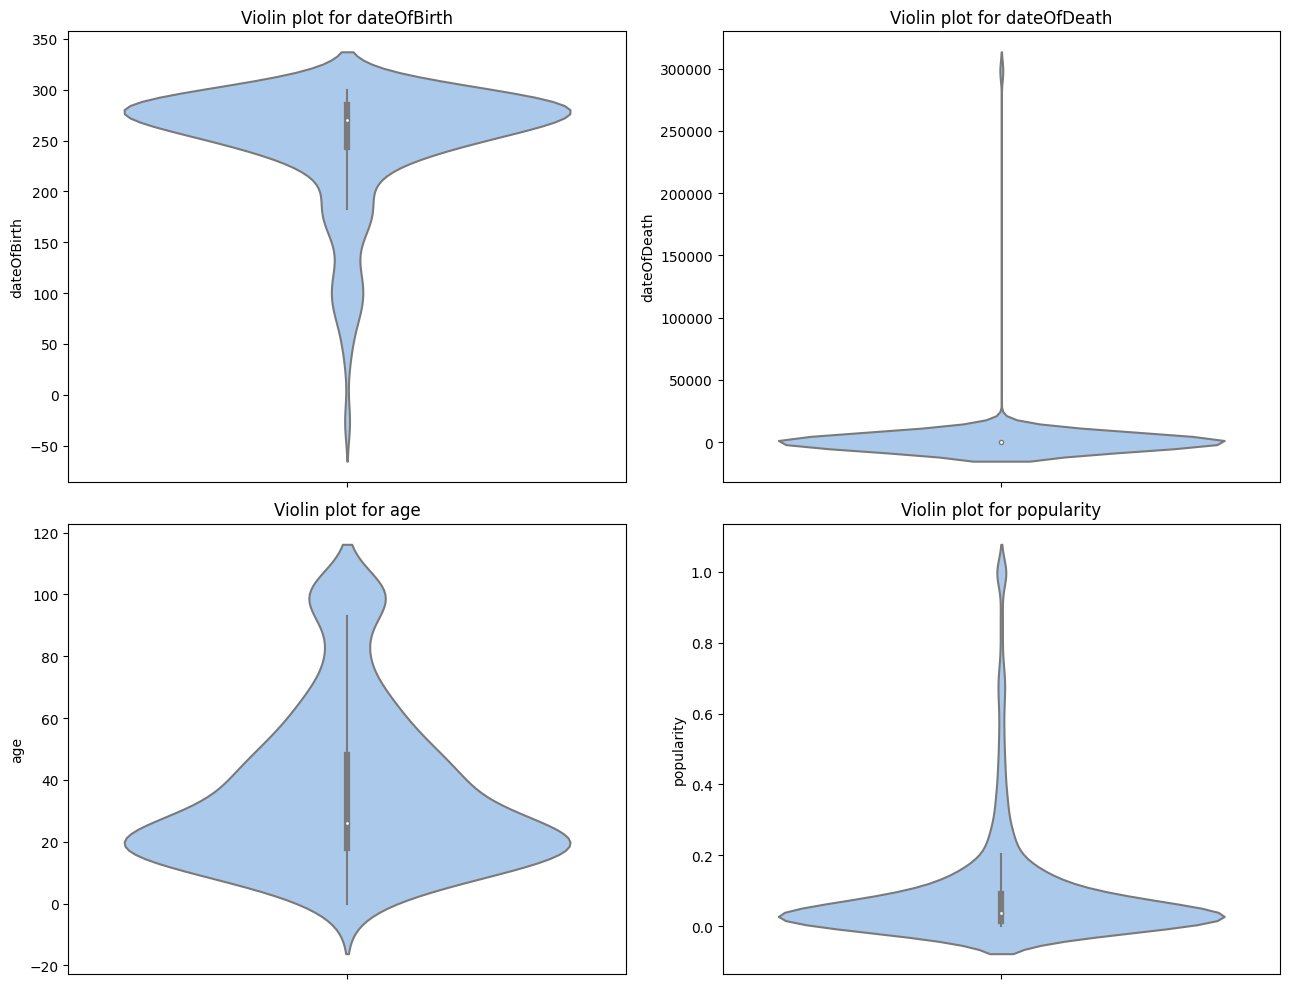

In [11]:
columns_violin = ['dateOfBirth', 'dateOfDeath', 'age', 'popularity']

sns.set_palette("pastel")

fig, axes = plt.subplots(2, 2, figsize=(13, 10))

for i in range(2):
    for j in range(2):
        col_index = i * 2 + j
        if col_index < len(columns_violin):
            sns.violinplot(y=df[columns_violin[col_index]], ax=axes[i, j])
            axes[i, j].set_ylabel(columns_violin[col_index])
            axes[i, j].set_title(f'Violin plot for {columns_violin[col_index]}')
        else:
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()


In [15]:
d = df['dateOfDeath'].value_counts().reset_index()

d.columns = ['Value', 'Number of observations']

print(d)

       Value  Number of observations
0      299.0                     110
1      300.0                      55
2      298.0                      33
3      283.0                      16
4      130.0                      15
5      282.0                       5
6      211.0                       4
7      209.0                       3
8      120.0                       3
9      289.0                       3
10     129.0                       3
11     297.0                       3
12     105.0                       3
13     196.0                       3
14     284.0                       2
15     226.0                       2
16     278.0                       2
17     112.0                       2
18     133.0                       2
19     281.0                       2
20  298299.0                       2
21     294.0                       2
22     248.0                       1
23     161.0                       1
24     267.0                       1
25     264.0                       1
2

In [18]:
print(df[df['dateOfDeath'] == 298299.0])

         name       title  male   culture  dateOfBirth  dateOfDeath mother  \
528     Drogo        Khal     0  Dothraki        267.0     298299.0    NaN   
1182  Cohollo  Bloodrider     1  Dothraki          NaN     298299.0    NaN   

     father heir house              spouse  book1  book2  book3  book4  book5  \
528     NaN  NaN   NaN  Daenerys Targaryen      1      1      1      0      1   
1182    NaN  NaN  Khal                 NaN      1      0      0      0      0   

      isAliveMother  isAliveFather  isAliveHeir  isAliveSpouse  isMarried  \
528             NaN            NaN          NaN            1.0          1   
1182            NaN            NaN          NaN            NaN          0   

      isNoble   age  numDeadRelations  boolDeadRelations  isPopular  \
528         0  32.0                 5                  1          1   
1182        0   NaN                 0                  0          0   

      popularity  isAlive  
528     0.558528        0  
1182    0.033445   

We can observe an outlier in this column, which is dateOFBirth equal 298299 for 2 observations. It looks like a mistake made while creating the dataset. We will check the correctness of those 2 observations and pick one of the values (298 or 299) and replace those outliers with it.

After checking on the Internet it turns out that:
Khal Drogo - date of death - 299
Cohollo Bloodrider - no info but we assume it was 299


In [24]:
df.loc[df['dateOfDeath'] == 298299.0, 'dateOfDeath'] = 299.0
df.to_csv('../Data/Modeling/character-predictions-modeling.csv', index=False)

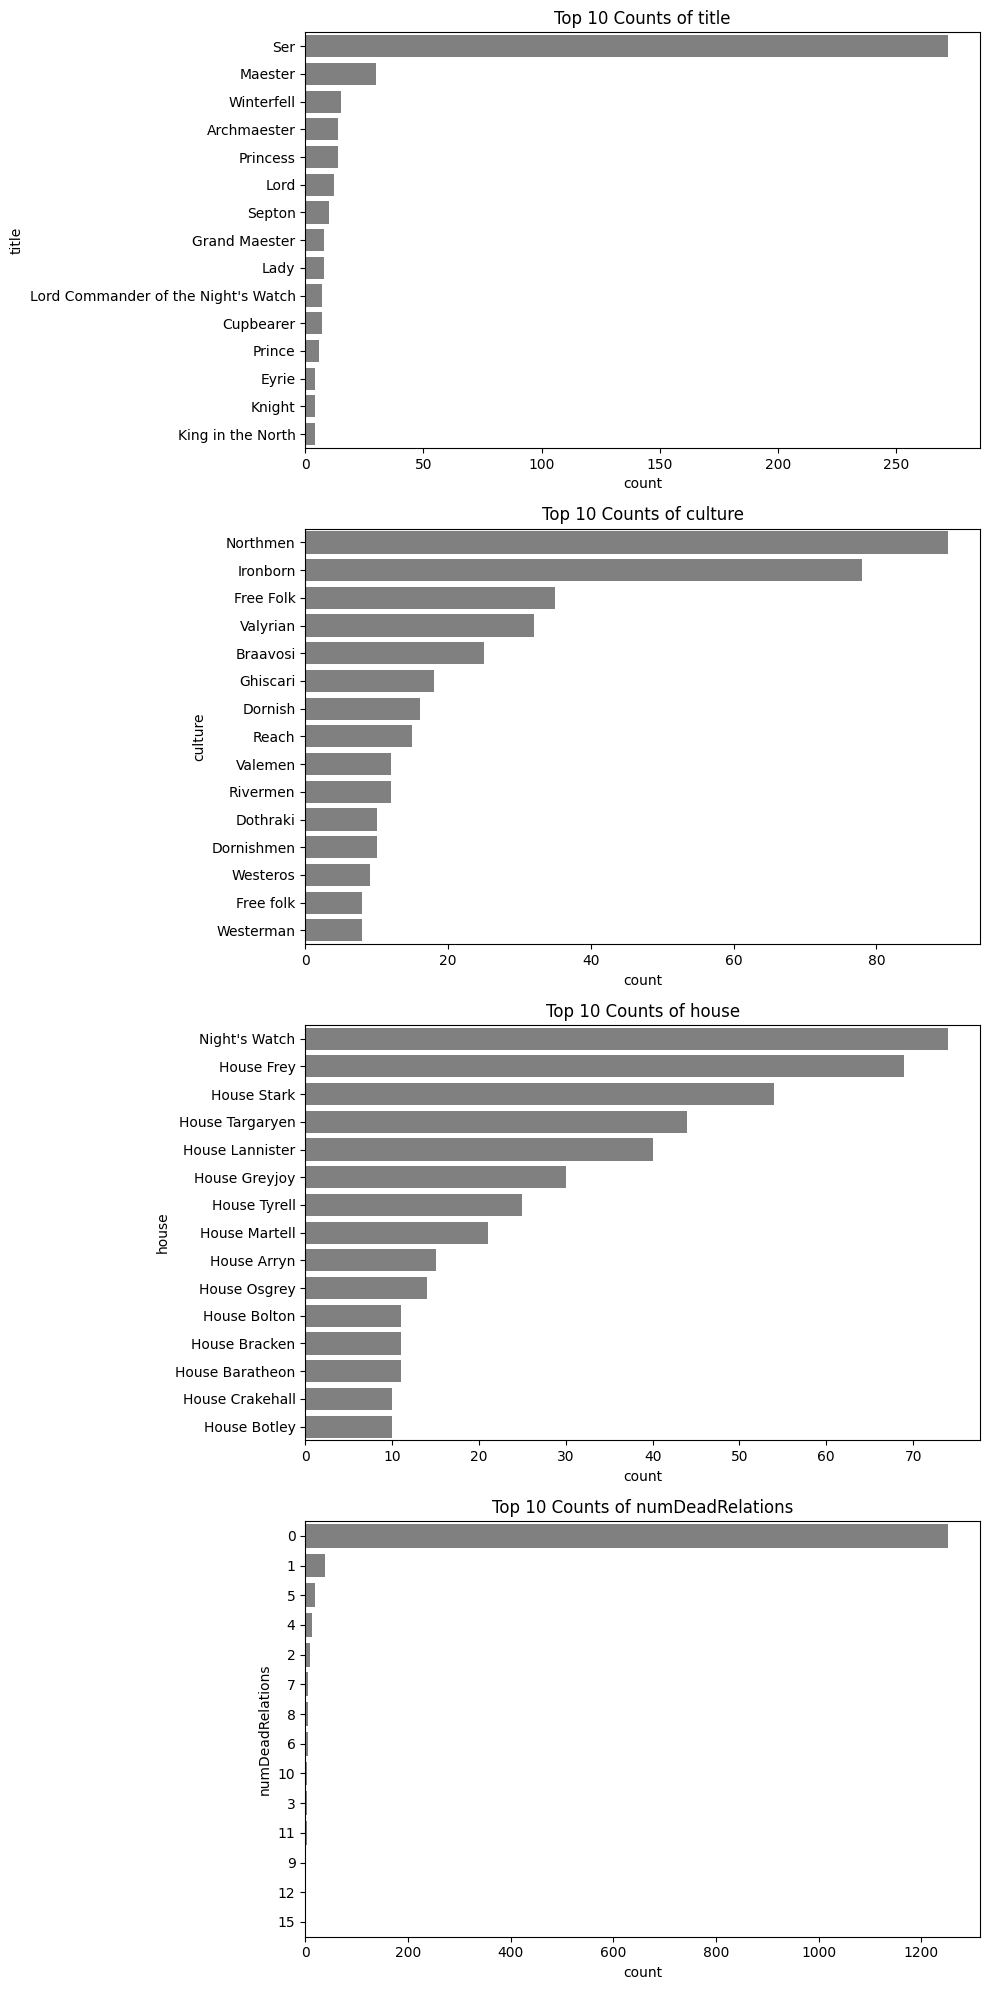

In [4]:
columns_countplot = ['title', 'culture', 'house', 'numDeadRelations']

fig, axes = plt.subplots(4, 1, figsize=(10, 20))

for i, col in enumerate(columns_countplot):
    top_values = df[col].value_counts().head(15)

    sns.countplot(y=df[col], order=top_values.index, ax=axes[i], color='gray')
    
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Top 10 Counts of {col}')

plt.tight_layout()
plt.show()

### Let's look at the correlation matrix

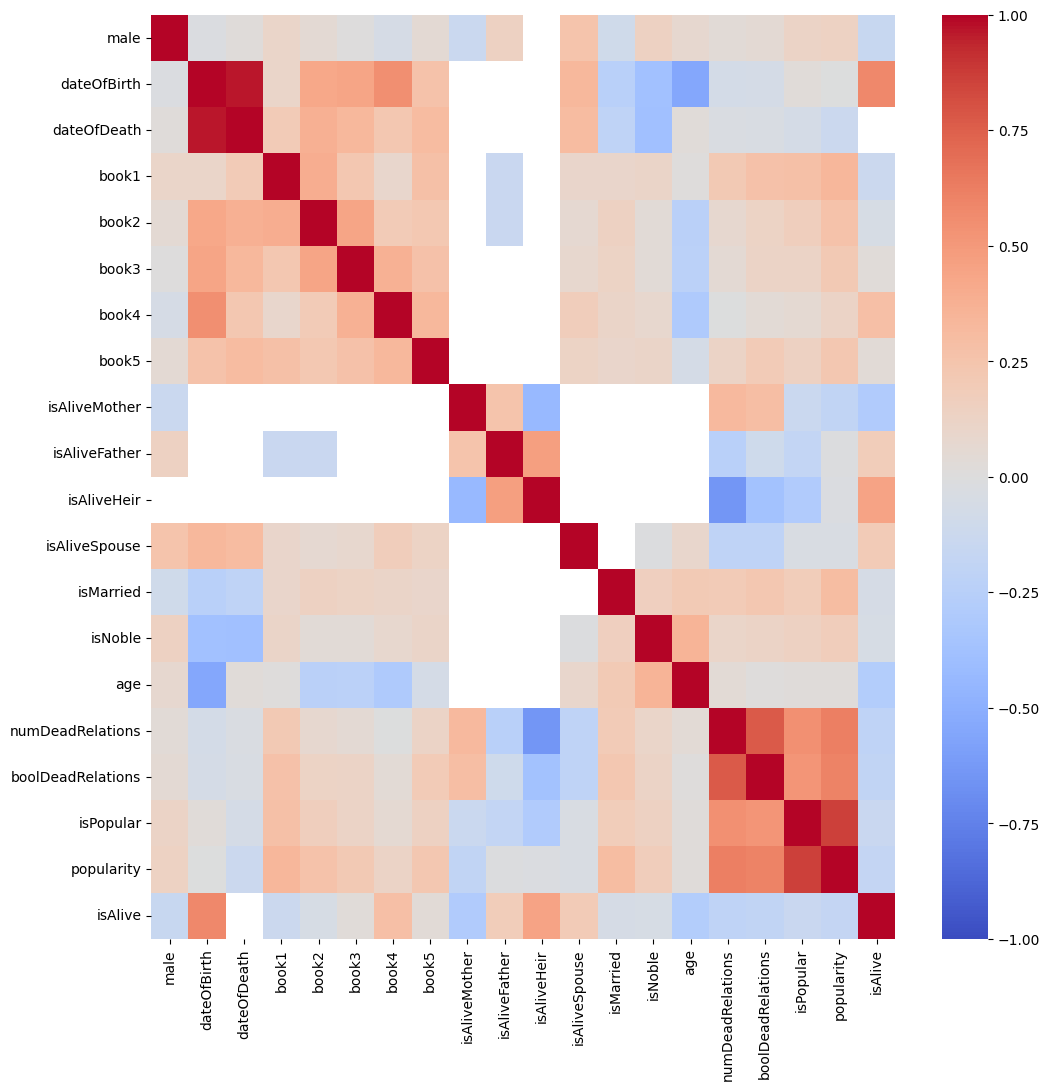

In [21]:
corr = df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=False, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'dateOfBirth'}>,
        <Axes: title={'center': 'dateOfDeath'}>,
        <Axes: title={'center': 'book1'}>],
       [<Axes: title={'center': 'book2'}>,
        <Axes: title={'center': 'book3'}>,
        <Axes: title={'center': 'book4'}>,
        <Axes: title={'center': 'book5'}>],
       [<Axes: title={'center': 'isAliveMother'}>,
        <Axes: title={'center': 'isAliveFather'}>,
        <Axes: title={'center': 'isAliveHeir'}>,
        <Axes: title={'center': 'isAliveSpouse'}>],
       [<Axes: title={'center': 'isMarried'}>,
        <Axes: title={'center': 'isNoble'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'numDeadRelations'}>],
       [<Axes: title={'center': 'boolDeadRelations'}>,
        <Axes: title={'center': 'isPopular'}>,
        <Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'isAlive'}>]], dtype=object)

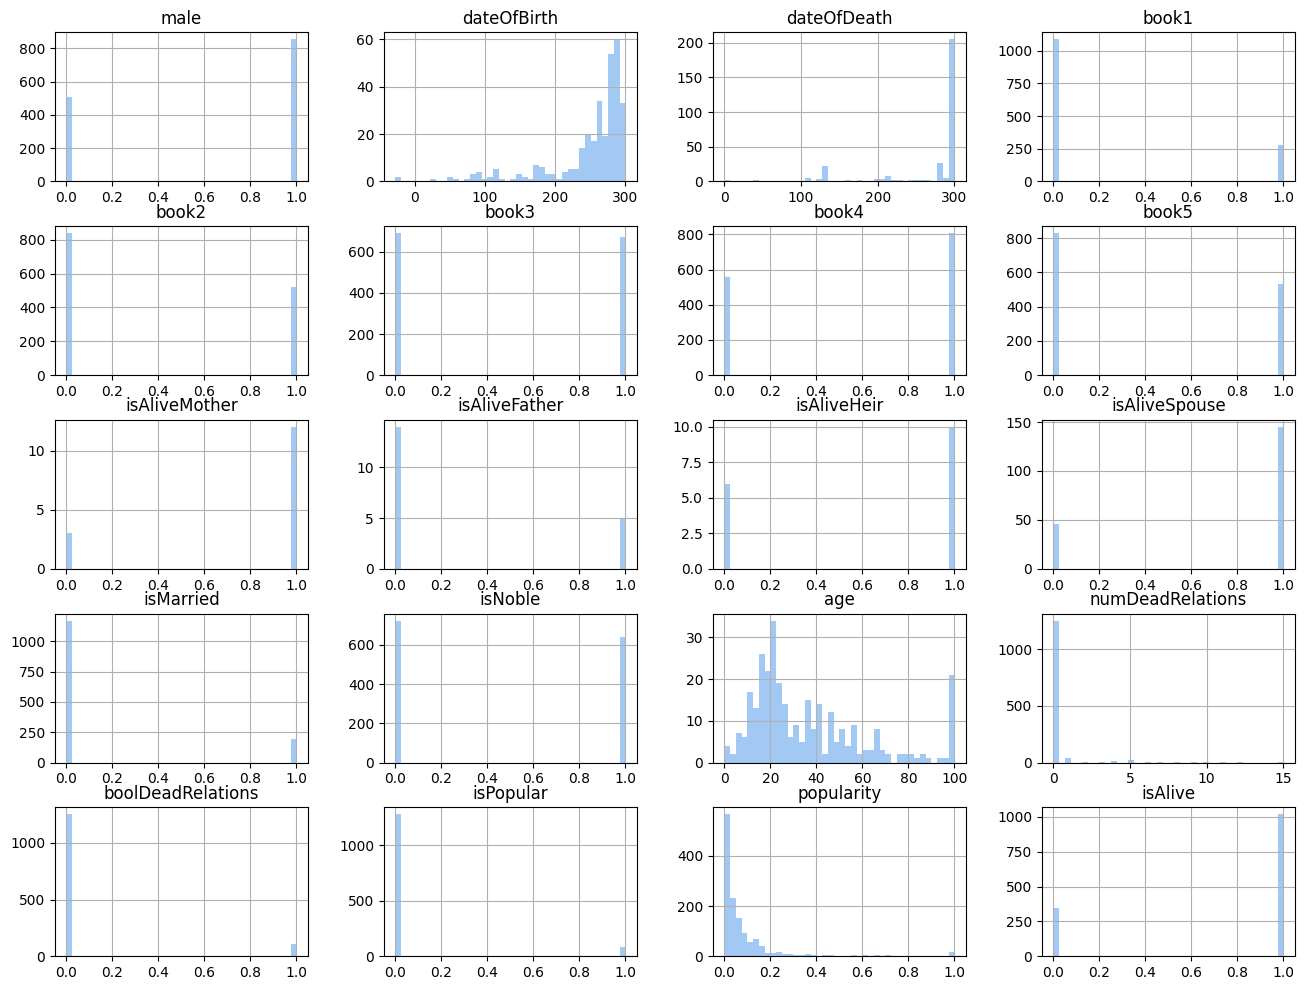

In [23]:
df.hist(bins=40, figsize=(16,12))

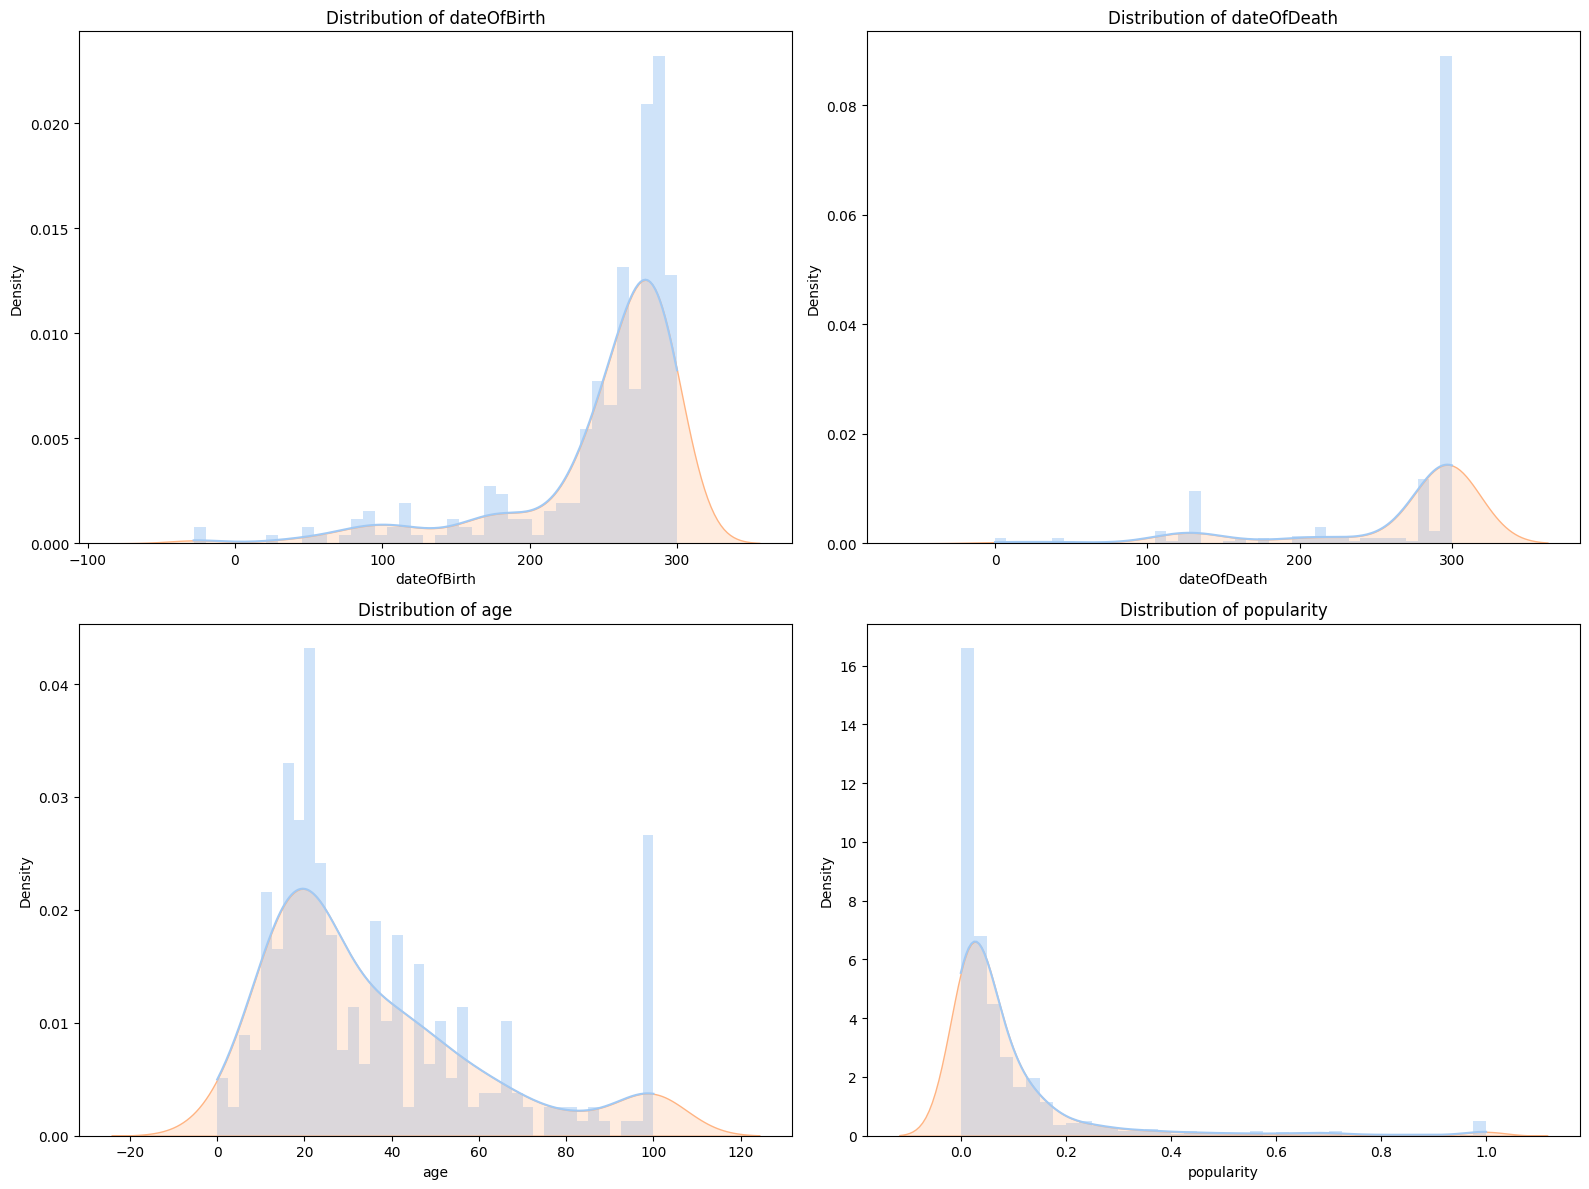

In [22]:
numerical_df = df[["dateOfBirth","dateOfDeath","age","popularity"]]
numerical_cols = numerical_df.select_dtypes(include=[np.number]).columns.tolist()

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, stat='density', ax=axs[i], bins=40, linewidth=0)
    sns.kdeplot(df[col], fill=True, ax=axs[i])

    axs[i].set_title(f"Distribution of {col}")

fig.tight_layout()
plt.show()

Interesting that the age of a 100 years is so common. Also the years close to 300 is the time a lot of characters died.

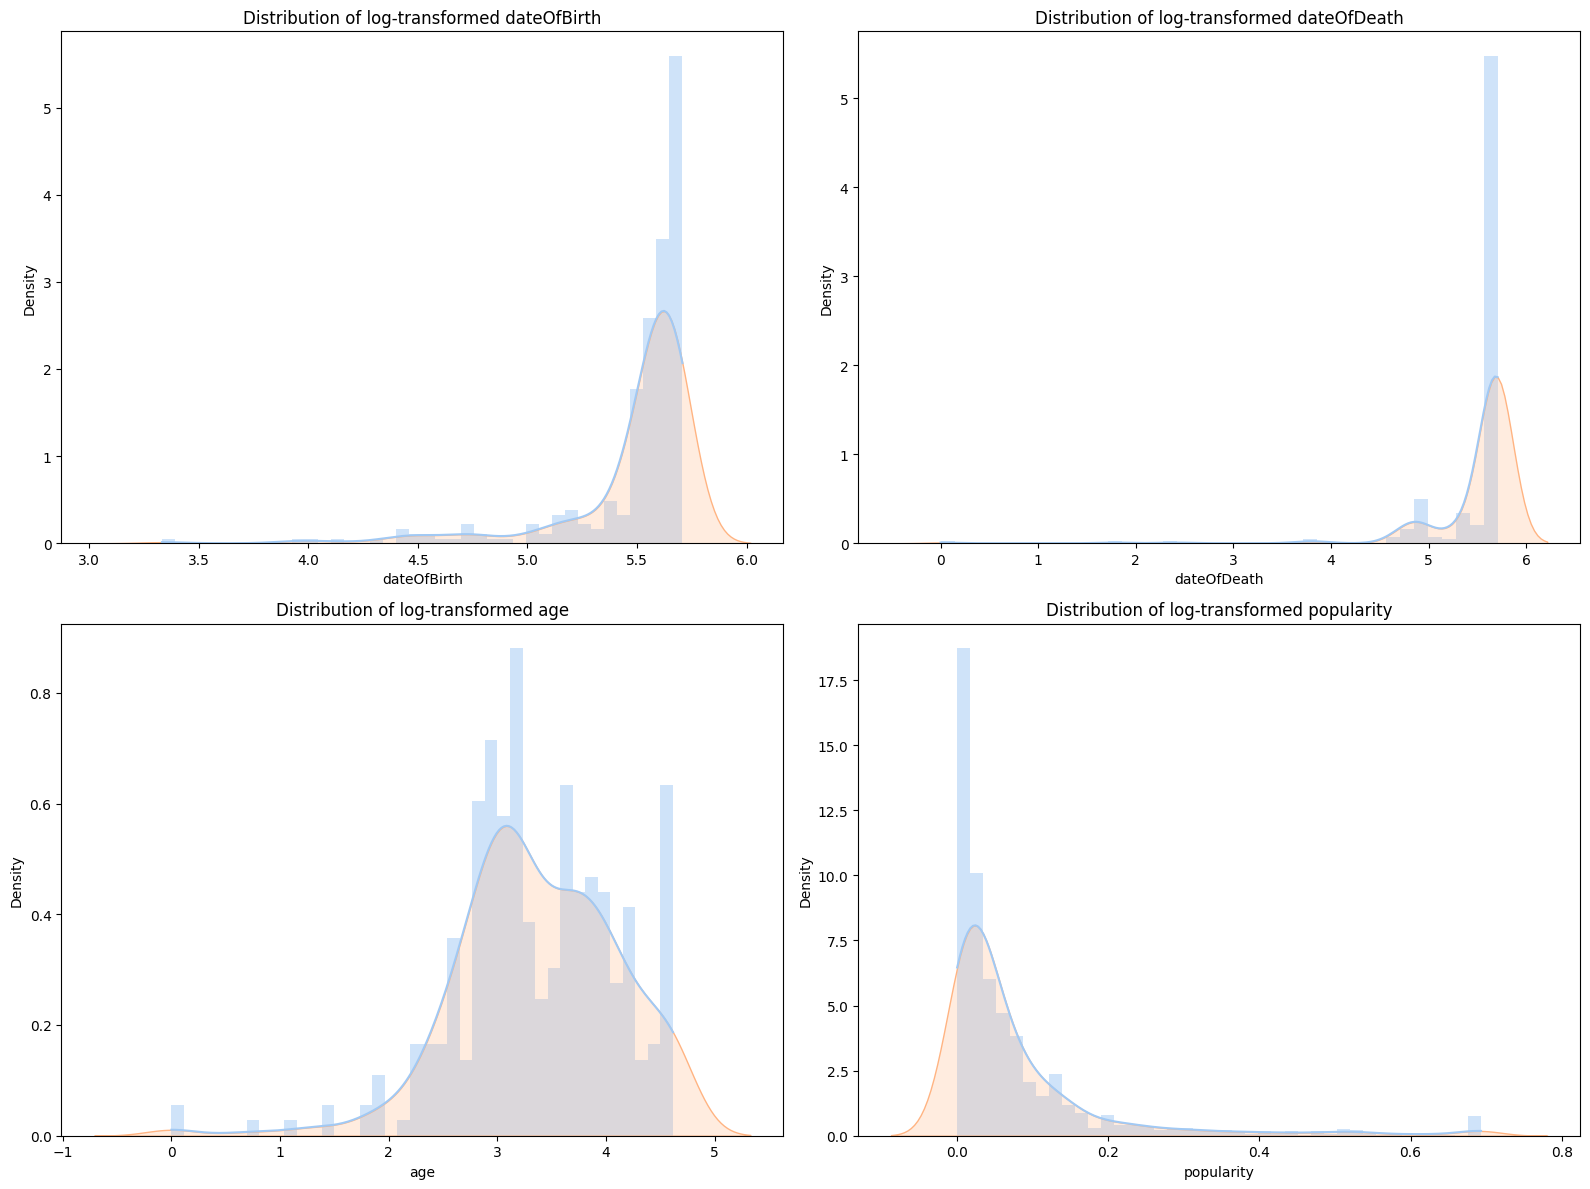

In [26]:
numerical_cols = numerical_df.select_dtypes(include=[np.number]).columns.tolist()

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    log_values = np.log1p(numerical_df[col])
    sns.histplot(log_values, kde=True, stat='density', ax=axs[i], bins=40, linewidth=0)
    sns.kdeplot(log_values, fill=True, ax=axs[i])

    axs[i].set_title(f"Distribution of log-transformed {col}")

fig.tight_layout()
plt.show()

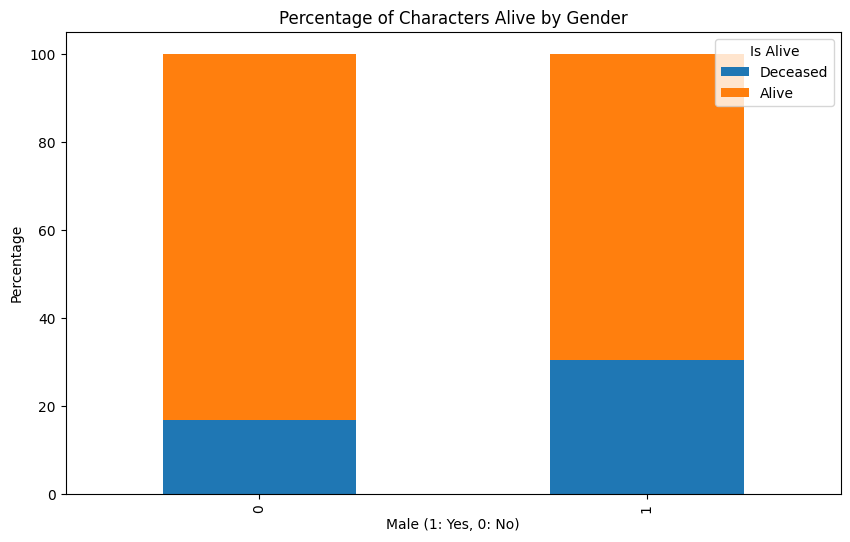

In [27]:
gender_alive_counts = df.groupby(['male', 'isAlive']).size().reset_index(name='count')
gender_totals = df.groupby(['male']).size().reset_index(name='total')
gender_alive_counts = gender_alive_counts.merge(gender_totals, on='male')
gender_alive_counts['percentage'] = (gender_alive_counts['count'] / gender_alive_counts['total']) * 100

gender_alive_pivot = gender_alive_counts.pivot(index='male', columns='isAlive', values='percentage').fillna(0)

ax = gender_alive_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Percentage of Characters Alive by Gender')
plt.xlabel('Male (1: Yes, 0: No)')
plt.ylabel('Percentage')
plt.legend(title='Is Alive', loc='upper right', labels=['Deceased', 'Alive'])
plt.show()

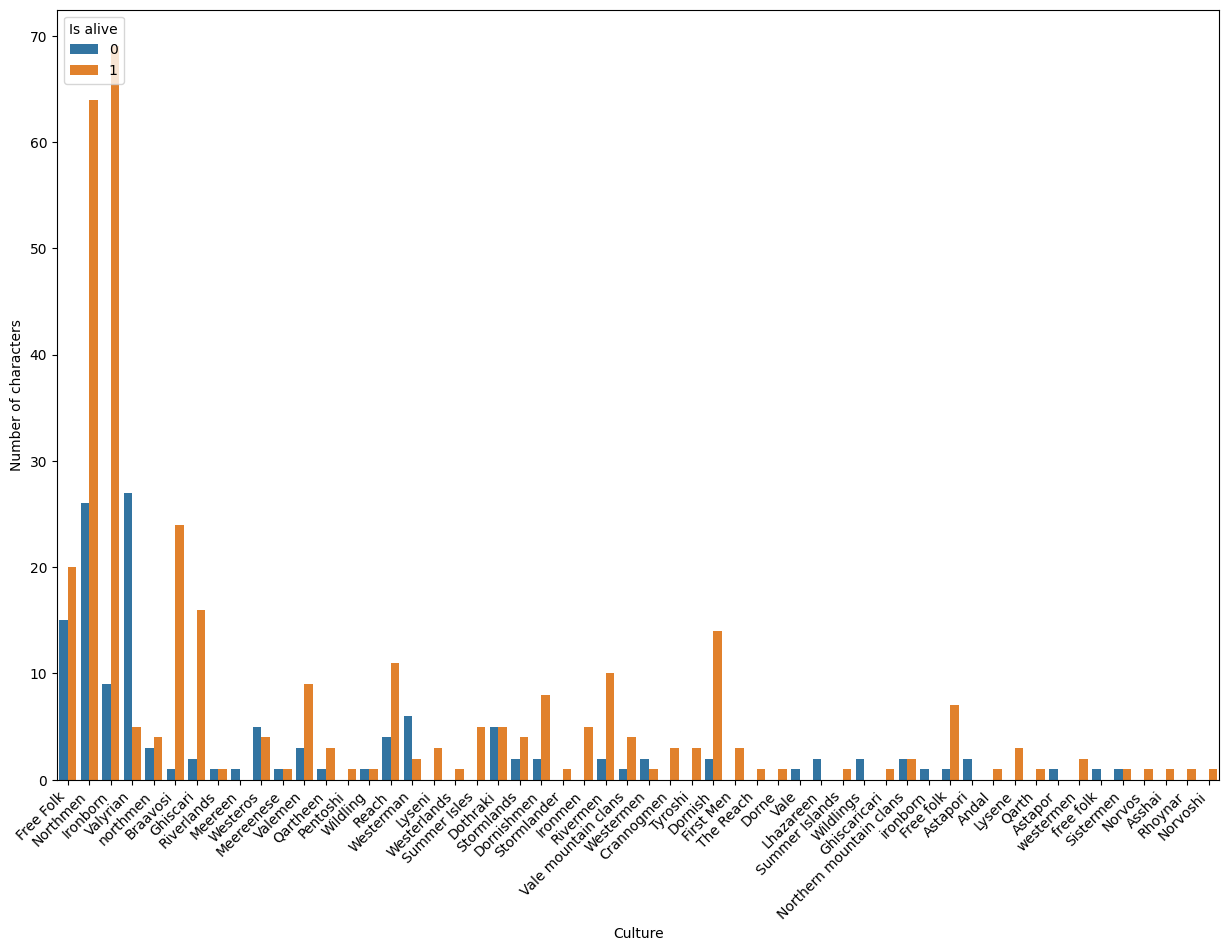

In [5]:
plt.figure(figsize=(15, 10))
fig = sns.countplot(data=df, x='culture', hue='isAlive')
plt.xlabel('Culture')
plt.ylabel('Number of characters')
plt.legend(title='Is alive')

fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

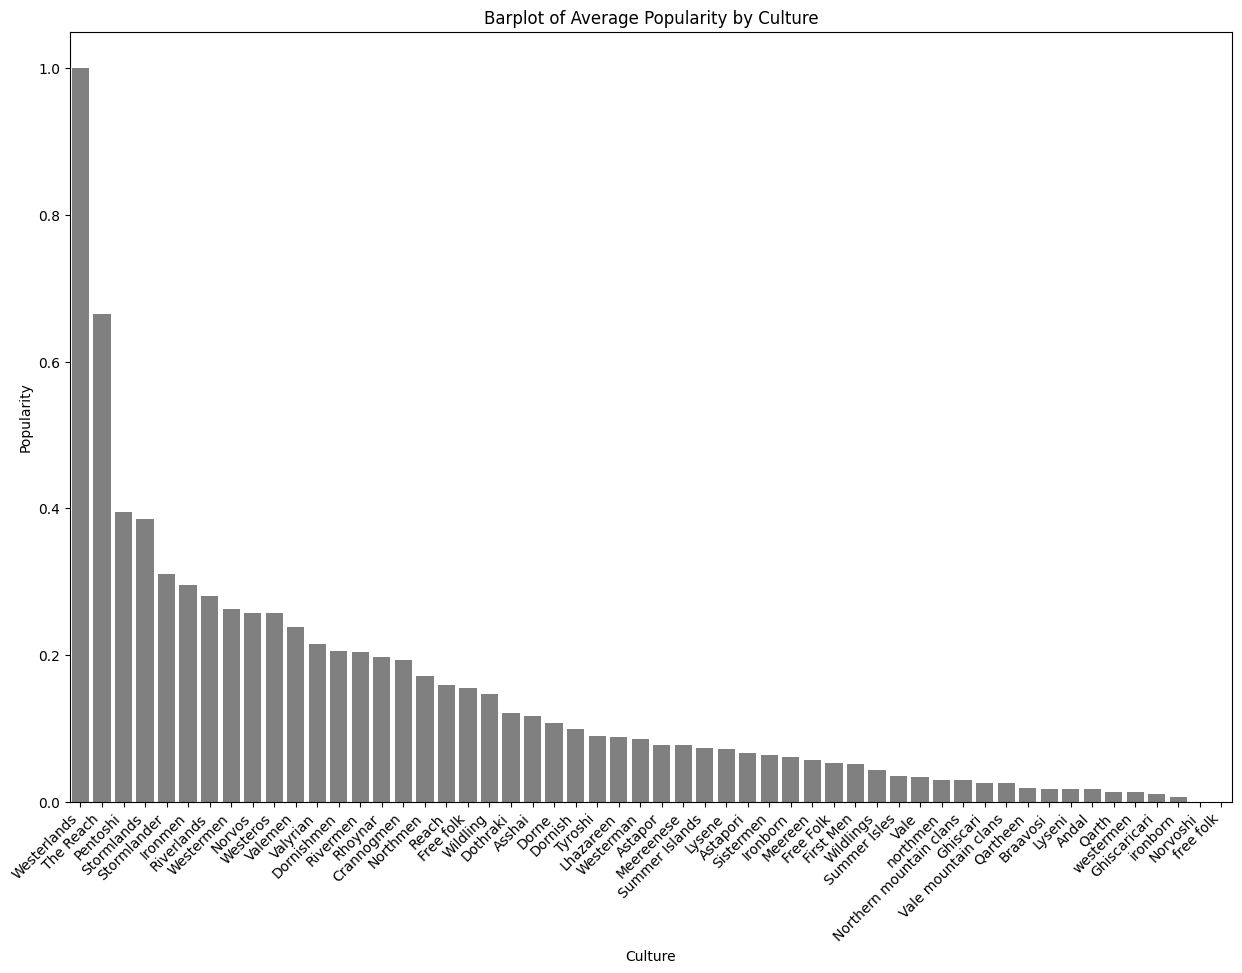

In [8]:
average_popularity = df.groupby('culture')['popularity'].mean().sort_values(ascending=False)
sorted_cultures = average_popularity.index

plt.figure(figsize=(15, 10))
fig = sns.barplot(data=df, x='culture', y='popularity', ci=None, order=sorted_cultures, color="grey") 
plt.xlabel('Culture')
plt.ylabel('Popularity')
plt.title('Barplot of Average Popularity by Culture')

fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

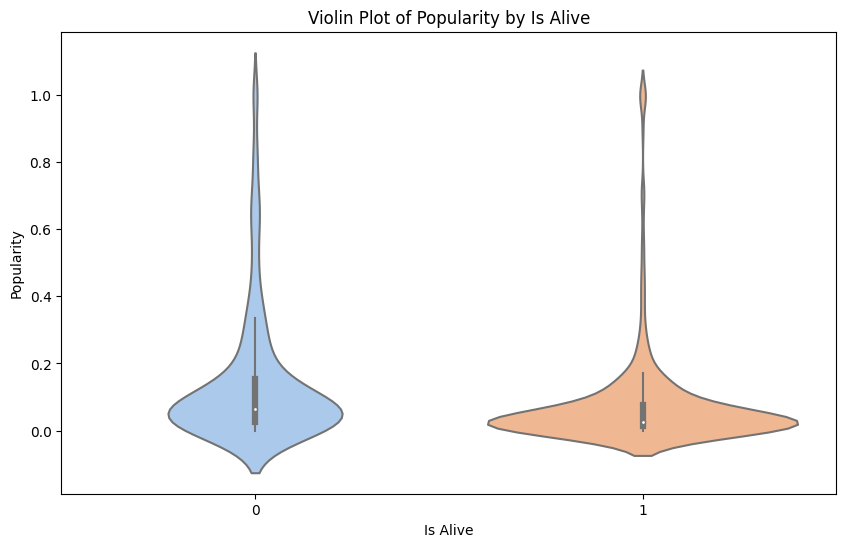

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='isAlive', y='popularity')
plt.xlabel('Is Alive')
plt.ylabel('Popularity')
plt.title('Violin Plot of Popularity by Is Alive')
plt.show()

Let's check if more popular characters have less NaN values.

In [31]:
def check_nan_distribution(df, popularity_column, columns_to_check, threshold=5):
    less_popular = df[df[popularity_column] <= threshold]
    more_popular = df[df[popularity_column] > threshold]

    print(f"Sprawdzanie NaN w kolumnach dla rekordów z popularnością <= {threshold}")
    for column in columns_to_check:
        nan_count = less_popular[column].isna().sum()
        total_count = len(less_popular)
        print(f"Kolumna {column}: {nan_count} z {total_count} ({nan_count / total_count:.2%})")

    print(f"\nSprawdzanie NaN w kolumnach dla rekordów z popularnością > {threshold}")
    for column in columns_to_check:
        nan_count = more_popular[column].isna().sum()
        total_count = len(more_popular)
        print(f"Kolumna {column}: {nan_count} z {total_count} ({nan_count / total_count:.2%})")

popular_columns = ['isAlive', 'culture', 'house', 'dateOfBirth', 'dateOfDeath', 'mother', 'father', 'spouse']

# Sprawdzanie rozkładu NaN na podstawie popularności
check_nan_distribution(df, 'popularity', popular_columns)

Sprawdzanie NaN w kolumnach dla rekordów z popularnością <= 5
Kolumna isAlive: 0 z 1362 (0.00%)
Kolumna culture: 896 z 1362 (65.79%)
Kolumna house: 299 z 1362 (21.95%)
Kolumna dateOfBirth: 1047 z 1362 (76.87%)
Kolumna dateOfDeath: 1055 z 1362 (77.46%)
Kolumna mother: 1347 z 1362 (98.90%)
Kolumna father: 1343 z 1362 (98.60%)
Kolumna spouse: 1171 z 1362 (85.98%)

Sprawdzanie NaN w kolumnach dla rekordów z popularnością > 5
Kolumna isAlive: 0 z 0 (nan%)
Kolumna culture: 0 z 0 (nan%)
Kolumna house: 0 z 0 (nan%)
Kolumna dateOfBirth: 0 z 0 (nan%)
Kolumna dateOfDeath: 0 z 0 (nan%)
Kolumna mother: 0 z 0 (nan%)
Kolumna father: 0 z 0 (nan%)
Kolumna spouse: 0 z 0 (nan%)
